<a href="https://colab.research.google.com/github/sati99/Statistical_Analysis/blob/master/TrendingYoutubeVideos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link [Youtube Trending Video Analysis]
(https://www.kaggle.com/datasnaek/youtube-new)

     Top Views Video Wall

In [ ]:
from IPython.display import HTML, display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

yt_df = pd.read_csv('/GBvideos.csv')
yt_df = yt_df.dropna()
to_int = ['views']
for column in to_int:
    yt_df[column] = yt_df[column].astype(int)
yt_df = yt_df.drop_duplicates('video_id',keep='last').sort_values('views',ascending=False)
most_views_thumb = yt_df['thumbnail_link'].head(100).reset_index()['thumbnail_link']

ROW = 10
COLUMN = 10
tempHTML = ''
innerHTML = '<div style="block">'
    
for r in range(ROW):
    rowHTML = ''
    for c in range(COLUMN):
        #if c != COLUMN-1:
        tempHTML = '<img src="' + most_views_thumb[c*10+r] + '"style="float:left;width:80px;height:80px;margin:0">'
        rowHTML += tempHTML
        #else:
            #tempHTML = '<img src="' + most_views_thumb[c*10+r] + '"style="float:left;width:80px;height:80px;margin:0">'
            #rowHTML += tempHTML
    innerHTML += rowHTML #'<div>' +rowHTML + '</div>'
innerHTML += '</div>'
display(HTML(innerHTML))



#Importing libraries

In [ ]:
import numpy as np  #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns #plots
import json
import re #provides regular expression matching operations similar to those found in Perl.
import os #provides a portable way of using operating system dependent functionality.
from datetime import datetime #module supplies classes for manipulating dates and times.
import glob # module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import all the CSV files (US, CA, DE, GB, FR)
In here only focusing on Japan

In [ ]:
#read the data
yt_df = pd.read_csv('/GBvideos.csv',index_col='video_id')

#Combining all the statistics from each dataframe

In [ ]:
yt_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [ ]:
yt_df.shape

(38916, 15)

In [ ]:
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, Jw1Y-zhQURU to 4YFo4bdMO8Q
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           38916 non-null  object
 1   title                   38916 non-null  object
 2   channel_title           38916 non-null  object
 3   category_id             38916 non-null  int64 
 4   publish_time            38916 non-null  object
 5   tags                    38916 non-null  object
 6   views                   38916 non-null  int64 
 7   likes                   38916 non-null  int64 
 8   dislikes                38916 non-null  int64 
 9   comment_count           38916 non-null  int64 
 10  thumbnail_link          38916 non-null  object
 11  comments_disabled       38916 non-null  bool  
 12  ratings_disabled        38916 non-null  bool  
 13  video_error_or_removed  38916 non-null  bool  
 14  description             38304 non-null  obj

    statistical summary for numerical data 

In [ ]:
yt_df.describe()

,category_id,views,likes,dislikes,comment_count
count,38916.000000,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04
mean,16.827937,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04
std,7.752728,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02
50%,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03
75%,24.000000,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


    summary for non numeric data

In [ ]:
yt_df.describe(include=['O']) #Strings can also be used in the style of select_dtypes 

,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,38916,38916,38916,38916,38916,38916,38304
unique,205,3369,1625,3250,3122,3272,3704
top,18.07.01,Maroon 5 - Wait,The Tonight Show Starring Jimmy Fallon,2018-03-09T05:00:03.000Z,[none],https://i.ytimg.com/vi/2z3EUY1aXdY/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,200,40,208,55,2010,38,135


#Observations Drawn: 
1.From video_id description, we can see that there are 38916 videos (which is expected because our dataset contains 38916 entries), but we can see also that there are only 3272 unique videos which means that some videos appeared on the trending videos list on more than one day.

2.The table also tells us that the top frequent title is Maroon 5 — Wait and that it appeared 40 times on the trending videos list.

3.There are 3272 unique video IDs, we expect to have 3272 unique video titles also, because we assume that each ID is linked to a corresponding title. One possible interpretation is that a trending video had some title when it appeared on the trending list, then it appeared again on another day but with a modified title.

4. there are 205 unique dates

In [ ]:
yt_df.isnull().sum() #Missing values in the description column

trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               612
dtype: int64

    CLEAN THE DATA
    

#1. Remove irrelevant columns
looking at the columns we can tell tell the following can be dropped

In [ ]:
yt_df.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [ ]:
unwanted_cols= ['thumbnail_link','comments_disabled','ratings_disabled', 'video_error_or_removed' , 'description']
yt_df= yt_df.drop(unwanted_cols,axis=1) #making temp changes

In [ ]:
yt_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
video_id,,,,,,,,,,
Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479
3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882
PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37
rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30


#2 Getting rid of duplicate data

In [ ]:
yt_df.duplicated().value_counts()
#we have 171 duplicated rows

False    38745
True       171
dtype: int64

In [ ]:
yt_df= yt_df.drop_duplicates(keep="first")

#3.Processing the datetime data
### Looking at the trending_date or publish_time columns, we see that they are not yet in the correct format of datetime data.

In [ ]:
yt_df['trending_date'] = pd.to_datetime(yt_df['trending_date'],errors='coerce', format='%y.%d.%m')
yt_df['publish_time'] = pd.to_datetime(yt_df['publish_time'],errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [ ]:
#the resultant publish time column , its evident to see that it contains both time and date values.
#To add an extra dimension for insight, we shall split the publish time column into publish time and publish date
yt_df.insert(4,'publish_date',yt_df['publish_time'].dt.date)
yt_df['publish_time'] = yt_df['publish_time'].dt.time
#here 4 is the loc(0<len(cols))

In [ ]:
yt_df[['publish_date','publish_time']].head()

,publish_date,publish_time
video_id,,
Jw1Y-zhQURU,2017-11-10,07:38:29
3s1rvMFUweQ,2017-11-12,06:24:44
n1WpP7iowLc,2017-11-10,17:00:03
PUTEiSjKwJU,2017-11-13,02:30:38
rHwDegptbI4,2017-11-13,01:45:13


#Insert Category Column
the data reprensented by category_id is nomial data(codes that are meant to represent the object they can't be interpreted as numbers)

In [ ]:
yt_df['category_id'] = yt_df['category_id'].astype(str) #assigning its datatype

In [ ]:
categories_df = pd.read_json('/GB_category_id.json')
#reading the json files to find the categories

In [ ]:
#creating create a dictionary that contains keys as category_ids and values as the categories
id_to_category = {}
for category in categories_df['items']:
  id_to_category[category['id']] = category['snippet']['title']
#mapping to the df
yt_df.insert(4, 'category', yt_df['category_id'].map(id_to_category))

In [ ]:
yt_df.head()

,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count
video_id,,,,,,,,,,,,
Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,Howto & Style,2017-11-10,07:38:29,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479
3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,Entertainment,2017-11-12,06:24:44,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882
PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,Sports,2017-11-13,02:30:38,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37
rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,News & Politics,2017-11-13,01:45:13,[none],9815,30,2,30


#Visualization
1.Video Specific
2.Channel Specific
3.Category Specific
4.Year Specific
5.Word Cloud
6.Video wall

      1. Video Specefic

In [ ]:
#print the videos/channels/categories that have the most counts for statistics specified by the colum_stats 
#plus their corresponding comment count, likes and dislikes

def print_top5(column_of_interest,column_stats):
    df = yt_df.groupby(column_of_interest)['views', 'likes', 'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())
    return df.sort_values(by=column_stats, ascending=False).head()

In [ ]:
#visualize the videos/channels/categories that have the most counts for statistics specified by the colum_stats.

def visualize_top5(column_of_interest, column_stats):
    most_viewed_df = videos_df.groupby([column_of_interest])[column_stats].sum().reset_index()
    sorted_df= most_viewed_df.sort_values(column_stats, ascending=False).iloc[:5]
    ax = sorted_df.plot.bar(figsize = (15,15))
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df[column_of_interest]:
        labels.append(item[:20] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=12)
    plt.show()

A. 5 most viwed trending video

In [ ]:
print_top5('title','views')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,views,likes,comment_count,dislikes
title,,,,
Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon,8201898179,60362056,2226180,2895309
Bad Bunny - Amorfoda | Video Oficial,6891280759,106452827,6127443,5256551
Childish Gambino - This Is America (Official Video),5984728207,145019768,15087754,9371749
"Te Bote Remix - Casper, Nio García, Darell, Nicky Jam, Bad Bunny, Ozuna | Video Oficial",5151438858,53517444,2003208,2801757
Drake - God’s Plan,4625496538,118068312,7552432,2364386


B.5 most commented videos

In [ ]:
print_top5('title','comment_count')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,views,likes,comment_count,dislikes
title,,,,
So Sorry.,507795520,19193483,19081667,22383271
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291,71835062,15568558,2389777
Childish Gambino - This Is America (Official Video),5984728207,145019768,15087754,9371749
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,2403636485,52019389,14215092,27250882
Ariana Grande - No Tears Left To Cry,4107436350,97532165,7869276,3941157


C.5 most disliked videos

In [ ]:
print_top5('title','dislikes')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,views,likes,comment_count,dislikes
title,,,,
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,2403636485,52019389,14215092,27250882
So Sorry.,507795520,19193483,19081667,22383271
Lucas Lucco e Pabllo Vittar - Paraíso,1073294377,28344732,6861819,10006058
Childish Gambino - This Is America (Official Video),5984728207,145019768,15087754,9371749
Fergie Performs The U.S. National Anthem / 2018 NBA All-Star Game,766224864,2203357,2383615,6427854


D.words appear most in the titles in of trending videos

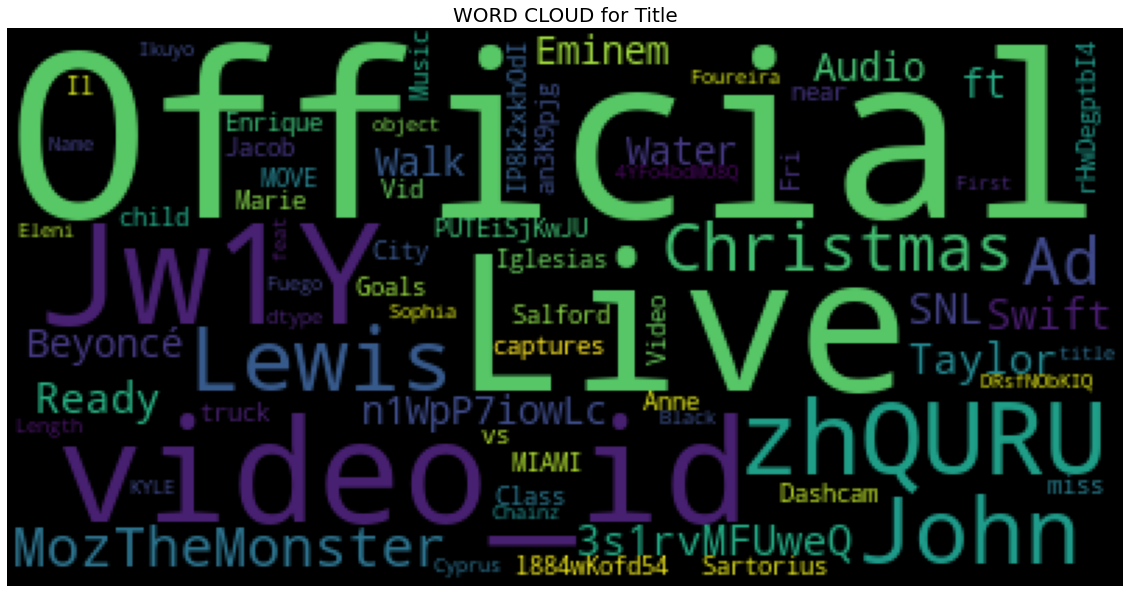

In [ ]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',stopwords = stopwords,max_words = 1000,max_font_size = 120,random_state = 42).generate(str(yt_df['title']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Title', fontsize = 20)
plt.axis('off')
plt.show()

E.How long usually a video can trend 

In [ ]:
def print_trends(col_of_interest):
  df= yt_df.groupby([yt_df.index,'channel_title'])
  return df.count()['title'].sort_values(ascending=False).reset_index().head()

In [ ]:
print_trends('title')

,video_id,channel_title,title
0,NooW_RbfdWI,Universal Pictures,38
1,BhIEIO0vaBE,Kylie Jenner,38
2,2z3EUY1aXdY,NFL,38
3,tGRzz0oqgUE,Janelle Monáe,37
4,YBpdL9hSac4,Disney•Pixar,37


    2. Channel specefic

*5 most viewed channels*

In [ ]:
print_top5('channel_title', 'views')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,views,likes,comment_count,dislikes
channel_title,,,,
NickyJamTV,8516190092,65854585,2947640,3771823
Ozuna,8305198063,71585436,2985745,4743926
Bad Bunny,6891280759,106452827,6127443,5256551
DrakeVEVO,6581834413,148133996,9225778,3429228
ChildishGambinoVEVO,5984728207,145019768,15087754,9371749


*5 most liked channels*

In [ ]:
print_top5('channel_title','likes')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,views,likes,comment_count,dislikes
channel_title,,,,
ibighit,3048635741,280534964,41660052,4281196
DrakeVEVO,6581834413,148133996,9225778,3429228
ChildishGambinoVEVO,5984728207,145019768,15087754,9371749
Bad Bunny,6891280759,106452827,6127443,5256551
Marvel Entertainment,3974502262,100232520,11494143,2210894


*5 most disliked channels*

In [ ]:
print_top5('channel_title','dislikes')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,views,likes,comment_count,dislikes
channel_title,,,,
Logan Paul Vlogs,1372942281,71887821,33012711,32417729
YouTube Spotlight,2411506573,52264441,14262175,27269629
Lucas Lucco,1073294377,28344732,6861819,10006058
ChildishGambinoVEVO,5984728207,145019768,15087754,9371749
MLG Highlights,767070771,2210446,2385838,6428022


*5 most commented channels*

In [ ]:
print_top5('channel_title','comment_count')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,views,likes,comment_count,dislikes
channel_title,,,,
ibighit,3048635741,280534964,41660052,4281196
Logan Paul Vlogs,1372942281,71887821,33012711,32417729
jypentertainment,3624070589,96640346,15703519,5542504
ChildishGambinoVEVO,5984728207,145019768,15087754,9371749
YouTube Spotlight,2411506573,52264441,14262175,27269629


*5 channels with the most trending videos*

In [ ]:
yt_df['channel_title'].value_counts().head()

The Tonight Show Starring Jimmy Fallon    206
TheEllenShow                              205
Jimmy Kimmel Live                         204
Saturday Night Live                       203
WWE                                       202
Name: channel_title, dtype: int64

    Category Specific

*5 most viewed categories*

In [ ]:
print_top5('category','views')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,views,likes,comment_count,dislikes
category,,,,
Music,170421287915,3724122394,291296926,158454494
Entertainment,29614782333,740404673,116362091,87571107
Film & Animation,8313953048,146549676,15521750,6152108
People & Blogs,5744816040,135181773,18648519,11979739
Comedy,3939099951,142900640,16683980,4612408


*5 most liked categories*

In [ ]:
print_top5('category','likes')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,views,likes,comment_count,dislikes
category,,,,
Music,170421287915,3724122394,291296926,158454494
Entertainment,29614782333,740404673,116362091,87571107
Film & Animation,8313953048,146549676,15521750,6152108
Comedy,3939099951,142900640,16683980,4612408
People & Blogs,5744816040,135181773,18648519,11979739


*5 most commented on categories*

In [ ]:
print_top5('category','comment_count')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,views,likes,comment_count,dislikes
category,,,,
Music,170421287915,3724122394,291296926,158454494
Entertainment,29614782333,740404673,116362091,87571107
People & Blogs,5744816040,135181773,18648519,11979739
Comedy,3939099951,142900640,16683980,4612408
Film & Animation,8313953048,146549676,15521750,6152108


*5 most disliked categories*

In [ ]:
print_top5('category','dislikes')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,views,likes,comment_count,dislikes
category,,,,
Music,170421287915,3724122394,291296926,158454494
Entertainment,29614782333,740404673,116362091,87571107
People & Blogs,5744816040,135181773,18648519,11979739
Sports,3337955656,74833628,10046587,9912215
Film & Animation,8313953048,146549676,15521750,6152108


#Category vs Trending videos

Text(0.5, 1.0, 'Catogories of trend videos in Great Britain')

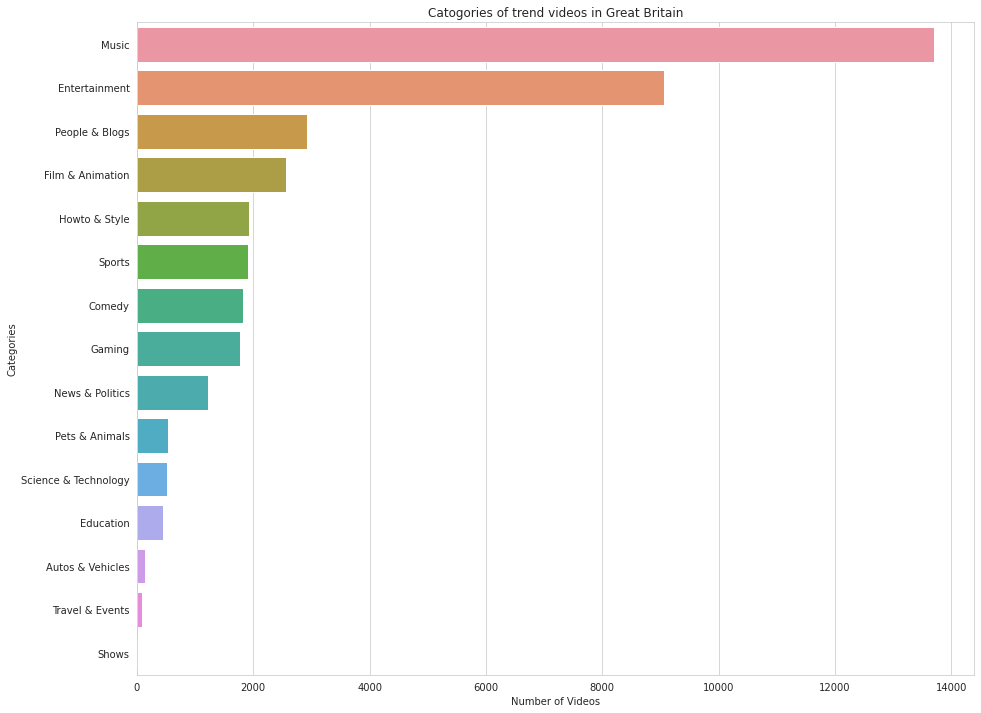

In [ ]:
df_GB = yt_df['category'].value_counts().reset_index()
plt.figure(figsize=(15,12))
sns.set_style("whitegrid")
ax = sns.barplot(y=df_GB['index'],x=df_GB['category'], data=df_GB,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in Great Britain")

    #Relationship between likes,dislikes,views and comments

In [ ]:
col_of_interest =['likes','dislikes','views','comment_count']
corr_matrix= yt_df[col_of_interest].corr()
corr_matrix

,likes,dislikes,views,comment_count
likes,1.000000,0.446528,0.795867,0.743711
dislikes,0.446528,1.000000,0.391824,0.772129
views,0.795867,0.391824,1.000000,0.466264
comment_count,0.743711,0.772129,0.466264,1.000000


[Text(0, 0, ''),
 Text(0, 0, 'likes'),
 Text(0, 0, ''),
 Text(0, 0, 'dislikes'),
 Text(0, 0, ''),
 Text(0, 0, 'views'),
 Text(0, 0, ''),
 Text(0, 0, 'comment_count'),
 Text(0, 0, '')]

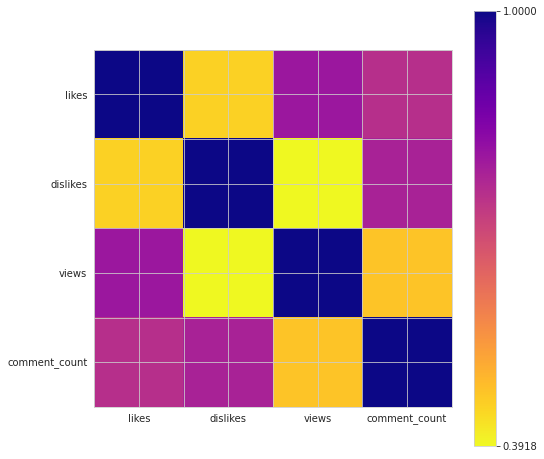

In [ ]:
#Visualization of corr_matrix via heatmap
fig, ax = plt.subplots(figsize=(8,8))
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap='plasma_r')
# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])
# making the labels
labels = ['']
for column in col_of_interest:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

#WordCloud for tags and description columns

In [ ]:
def wordcloud_column(column):
 plt.figure(figsize = (10,10))
 stopwords = set(STOPWORDS)
 wordcloud = WordCloud(
 background_color = 'black',
 stopwords = stopwords,
 max_words = 1000,
 max_font_size = 120,
 random_state = 42
 ).generate(str(yt_df[column]))
 plt.imshow(wordcloud)
 plt.title('WORD CLOUD for '+column.upper(), fontsize = 20)
 plt.axis('off')
 plt.show()


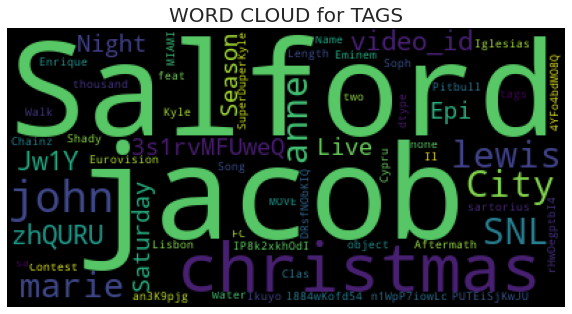

In [ ]:
wordcloud_column('tags')

#Sentimental Analysis on Video Tags
1. Import Libraries
2. Formation of necessary speech layers

In [ ]:
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

Text(0.5, 1.0, 'Polarity of Categories in Youtube videos')

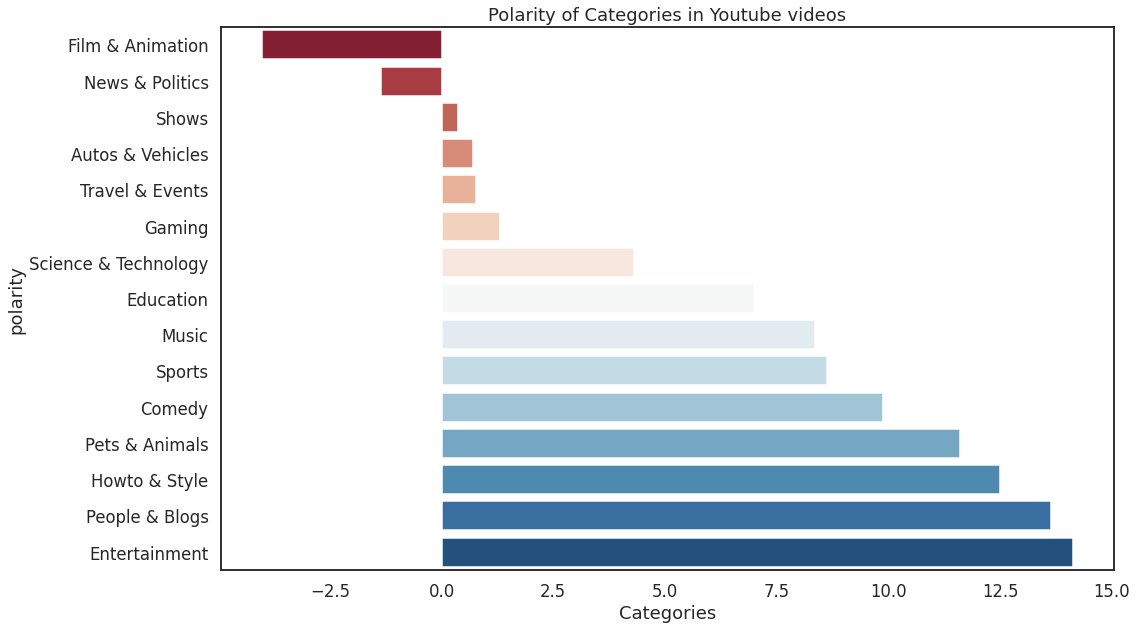

In [ ]:
MAX_N = 1000

#remove all the stopwords from the text
en_stopwords = list(stopwords.words('english'))
de_stopwords = list(stopwords.words('german'))   
fr_stopwords = list(stopwords.words('french'))   
en_stopwords.extend(de_stopwords)
en_stopwords.extend(fr_stopwords)

polarities = list()
category_list = yt_df['category'].unique()

for cate in category_list:
    tags_word = yt_df[yt_df['category']==cate]['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N),
                    columns=['Word', 'Frequency'])

    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

    polarities.append(compound)


category_list = pd.DataFrame(category_list)
polarities = pd.DataFrame(polarities)
tags_sentiment = pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns = ['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("Categories")
plt.ylabel("polarity")
plt.title("Polarity of Categories in Youtube videos")

By using sentiment analyzer from NLTK, we can examine the polarities of tags from all Youtube Trending Videos. All the 1000 most frequent tag from each categories were examined and result in form of number. NEGATIVE values indicate that most of the tags have negative sentiment and POSITIVE in contrast

turns out in Great Britain films & animation have the most negative sentiments followed by politics(kinda obvious)